参考： [[Kaggle]0から本当に機械学習を理解するために学ぶべきこと～一流のデータサイエンティストを例に～ - Qiita](https://qiita.com/zenonnp/items/9cbb2860505a32059d89)

# ライブラリインポート

In [98]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ↑これはJupyter内で図を描写するためのライブラリ

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# データ読み込み

In [99]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

# データ構成把握

In [100]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


![img](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F183674%2F7dff3491-0f16-4f59-8d75-48a93eb781ab.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&s=da8148e79d460bd2540e2931f3330bd1)

In [101]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Get data information

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ageが714

Cabinが204（明らかに少なすぎるので以後は考慮しない）

Name, Sex, Ticket, Embarkedは数値化されていない

In [103]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Fareが欠損

# データの特徴を把握する

In [104]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* トレーニングデータセットの合計は891で、タイタニック号に搭乗した乗客の実際の数（2,224）の40％です。
  * へー
* Survived は0または1の値を持つカテゴリカル特徴量です。
  * わかる
* トレーニングデータセットの約38％が実際のSurvived率の32％を代表して生き残りました。
  * へー
* ほとんどの乗客（> 75％）は親または子供と一緒に旅行しなかった。
  * どれ？？
* 乗客のほぼ30％が兄弟姉妹や配偶者を乗せていました。
  * どれ？？
* 運賃は、一部の乗客(< 1%)だけ異常に高く、512ドル払っていました。
  * わかる：Fare
* 65歳から80歳までの高齢者はほとんどいませんでした（< 1％）。
  * 1%はわからんがまあわかる

In [105]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lievens, Mr. Rene Aime",male,CA. 2343,G6,S
freq,1,577,7,4,644


* nameはデータセット全体で一意です（count = unique = 891）
  * わかる
* 65％が男性（top=male、freq= 577 / count= 891）
  * なるほど
* 客室の値はいくつかのトレーニングデータで二重になっています。 あるいは、複数の乗客が客室を共有しました。
  * わかる：Ticket
* Embarkedは3つの値をとる可能性があるが、 ほとんどの乗客がS港をから乗船しました。(top= S)
  * 644/669がSであってるのかな
* Ticket特徴量では、重複した値（ユニーク= 681 ）の割合（22％）が高い。
  * fm?
  
---

* Cabinは欠損が大きすぎるので使わない
* Ticketはユニーク値が少ない(681)ので使わない

# 相関を検証する

In [106]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


明らかに相関あり

In [107]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


明らかに相関あり

In [108]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [109]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


SibSpとParchは特定の数値では無相関
一部の数値を用いた新しい特徴量を作るべき

# データ可視化

仮説検証のためにデータを可視化する

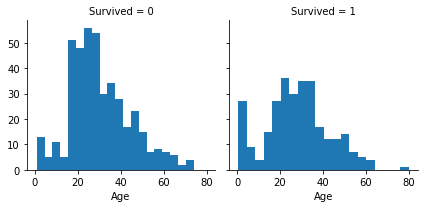

In [110]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 幼児の生存率が高い
- 最高年齢が生き残っている
- 多くの乗客が15~35周辺
- 15~25周辺の死亡率が高い

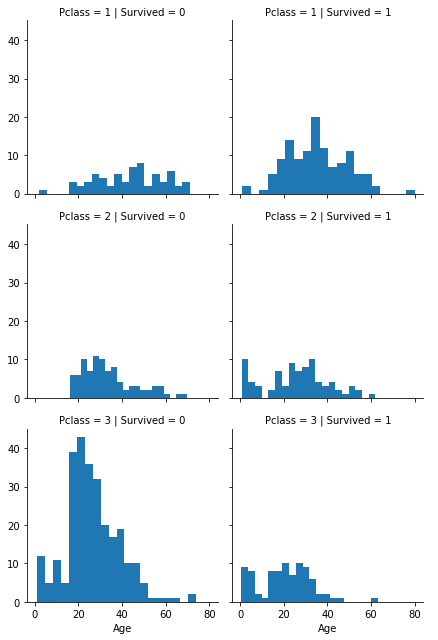

In [111]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()

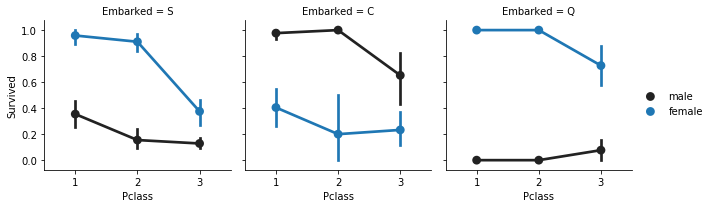

In [112]:
g = sns.FacetGrid(train_df, col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend()

- Embarked=Cはmaleとfemaleのバランスがが逆転する
- 全体的にfemaleのほうがmaleより生存している

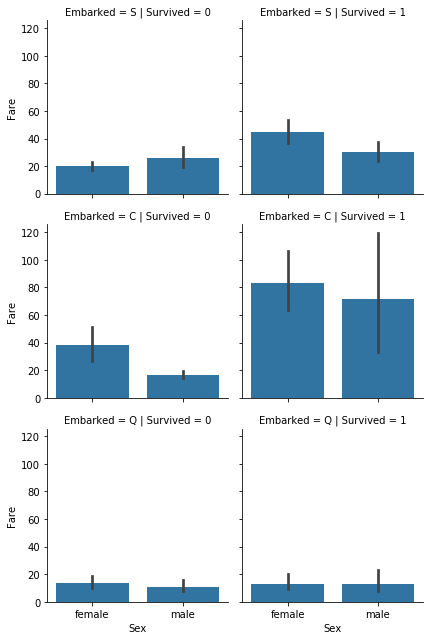

In [113]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()

- Embarkedによって明らかに生存率が変化している
- FareとEmbarkedによって明らかに生存率が変化している
- Fareが上の方が生存率が高い

# データラングリング
## 使わない特徴量を削除する

In [114]:
def dropDf(df):
    return df.drop(['Ticket', 'Cabin'], axis = 1)

train_df = dropDf(train_df)
test_df = dropDf(test_df)
combine = [train_df, test_df]

## 既存の特徴量から新しい特徴量を作成する
とりあえず名前の頭のやつを検証する

In [115]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [116]:
train_df[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


明らかに生き残っているやつとそうでないやつがある👀

In [117]:
train_df[["Title", "Age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Title,Age
0,Capt,70.000000
1,Col,58.000000
16,Sir,49.000000
7,Major,48.500000
6,Lady,48.000000
15,Rev,43.166667
4,Dr,42.000000
3,Don,40.000000
5,Jonkheer,38.000000
13,Mrs,35.898148


平均年齢は大きく差がある👀

使っていこう。
生存率を基準に名前を結合してみる

In [118]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir'], 'Good-Rare')
    dataset['Title'] = dataset['Title'].replace(['Capt','Don', 'Rev', 'Jonkheer'], 'Bad-Rare')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Col','Dr', 'Major', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Bad-Rare,0.000000
1,Good-Rare,1.000000
2,Master,0.575000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651
6,Rare,0.500000


```
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
```
このあたりはドメイン知識が無いと無理だな

とりあえずはこれらを数値に変換しておく。
せめて生存者割合逆順で。

TODO?: 非順序的情報のカテゴリ化

In [119]:
title_mapping= {'Bad-Rare': 1, 'Mr': 2, 'Rare': 3, 'Master': 4, 'Miss': 5, 'Mrs': 6, 'Good-Rare': 7}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2
